In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Python path
import sys
base_folder = 'DataScience'
location_base = os.path.join(os.getcwd().split(base_folder)[0], base_folder)
location_module = [os.path.join(location_base, 'Module')] 
for each in location_module:
    if each not in sys.path:
        sys.path.append(each)

# Auto reload of library
%reload_ext autoreload
%autoreload 2

# Import public library
from install_import_KK import *
from preprocessing_KK import *

# 데이터로딩

In [2]:
columns_under = ['Name', 'Name_ENG', 'Identity', 'Division', 'Department', 'E-mail',
                 'Task1', 'Task2', 'Task3', 'Task4', 'Task5',
                 'w1', 'w2', 'w3', 'w4', 'w5', 'Mid&Final']
columns_graduate = ['Name', 'Name_ENG', 'Identity', 'Division', 'Department', 'E-mail',
                    'Task1', 'Task2', 'Task3', 'Task4', 'Task5', 'Task6', 'Task7',
                    'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'Mid&Final']

df_dict = dict()
class_name = ['E데이터베이스1', 'E데이터베이스2', '빅데이터', '비즈니스혁신을위한데이터사이언스응용']
sheet_list = ['EDB1', 'EDB2', 'BD', 'BI']
for sheet in sheet_list:
    df_sub = pd.read_excel('2022-01_Scores_KK.xlsx', sheet_name=sheet)
    if sheet != 'BI':
        df_sub.columns = columns_under
    else:
        df_sub.columns = columns_graduate
    df_dict[sheet] = df_sub    

# 각 반별 기말고사 점수분포

Class:  E데이터베이스1


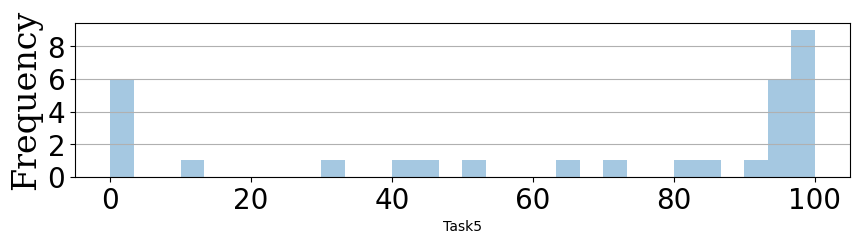

Class:  E데이터베이스2


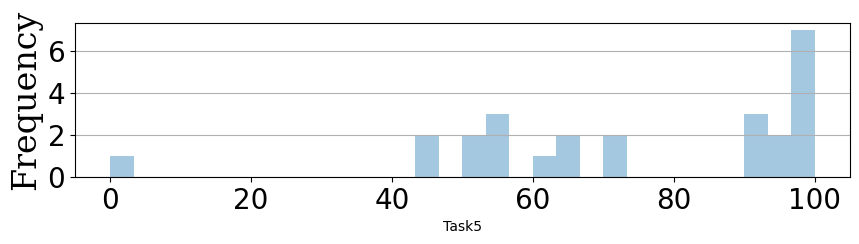

Class:  빅데이터


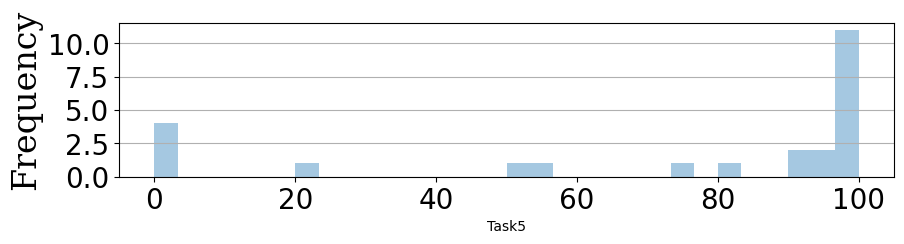

Class:  비즈니스혁신을위한데이터사이언스응용


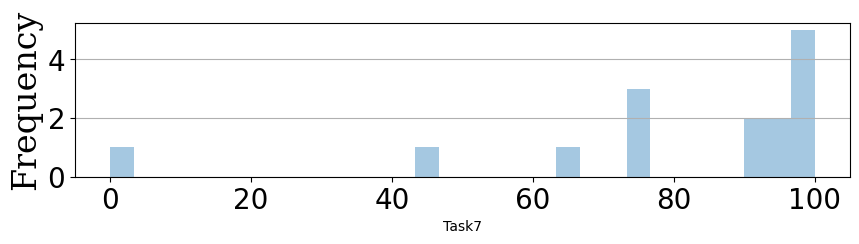

In [3]:
fontsize = 20
for num, (key, score) in enumerate(df_dict.items()):
    print('Class: ', class_name[num])
    if key == 'BI': target = 'Task7'
    else: target = 'Task5'
    plt.rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[key][target], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

# 각 반별 모든 과제 점수분포 현황

In [4]:
fontsize = 20
for num, (key, score) in enumerate(df_dict.items()):
    print('Class: ', class_name[num])
    if key == 'BI':
        display(score.describe().iloc[:,1:8])
    else:
        display(score.describe().iloc[:,1:6])

Class:  E데이터베이스1


,Task1,Task2,Task3,Task4,Task5
count,31.00,31.00,31.00,31.00,31.00
mean,72.84,78.10,70.84,50.81,65.65
std,27.29,34.98,34.71,35.17,40.22
min,0.00,0.00,0.00,0.00,0.00
25%,67.50,77.50,67.50,20.00,35.00
50%,80.00,95.00,90.00,50.00,90.00
75%,90.00,100.00,95.00,78.00,100.00
max,100.00,100.00,100.00,100.00,100.00


Class:  E데이터베이스2


,Task1,Task2,Task3,Task4,Task5
count,25.00,25.00,25.00,25.00,25.00
mean,81.64,87.80,79.72,64.40,73.72
std,14.47,21.27,30.11,28.55,26.05
min,45.00,0.00,0.00,0.00,0.00
25%,75.00,90.00,80.00,50.00,55.00
50%,85.00,95.00,90.00,70.00,70.00
75%,90.00,100.00,95.00,85.00,100.00
max,100.00,100.00,100.00,100.00,100.00


Class:  빅데이터


,Task1,Task2,Task3,Task4,Task5
count,24.00,24.00,24.00,24.00,24.00
mean,71.04,78.79,76.04,67.54,72.92
std,33.22,33.79,35.72,31.43,38.78
min,0.00,0.00,0.00,0.00,0.00
25%,69.25,75.75,78.75,56.25,53.75
50%,84.50,95.00,95.00,75.50,95.00
75%,92.00,100.00,95.00,90.00,100.00
max,100.00,100.00,100.00,100.00,100.00


Class:  비즈니스혁신을위한데이터사이언스응용


,Task1,Task2,Task3,Task4,Task5,Task6,Task7
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,87.67,79.27,83.00,86.33,76.47,73.67,80.33
std,8.84,15.61,18.50,25.94,25.98,35.18,27.56
min,75.00,44.00,35.00,0.00,0.00,0.00,0.00
25%,80.00,75.00,82.50,90.00,73.50,57.50,75.00
50%,90.00,75.00,90.00,95.00,85.00,90.00,90.00
75%,95.00,92.50,92.50,100.00,92.50,100.00,100.00
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00


# 각 반별 개별 점수 확인

- 각 과제별 배점 비중은 다르고, `마지막 과제`는 기말대체기 때문에 `40% 반영`
- `최종점수(Mid&Final)`는 출석점수를 제외한 `절대점수(80점환산)`
- 최종학점은 출석과 학점반영 방식을 고려하여 `재계산`되어 최종 부여될 예정
- `0점` 사유는 대부분 `파일이 열리지 않거나(확인안한 자기책임)` + `누군지 알수 없거나(자기PR 실패)` + `제출기한을 넘기거나(우리는 닥터스트레인지가 아님)` +`표절(당연)` 등

In [5]:
fontsize = 20
for num, (key, score) in enumerate(df_dict.items()):
    print('Class: ', class_name[num])
    if key == 'BI':
        display(score.iloc[:,[2,6,7,8,9,10,11,12,-1]])
    else:
        display(score.iloc[:,[2,6,7,8,9,10,-1]])

Class:  E데이터베이스1


,Identity,Task1,Task2,Task3,Task4,Task5,Mid&Final
0,201602807,0,0,0,0,0,0.00
1,201600949,90,100,100,76,100,74.70
2,202000826,85,100,90,80,90,70.25
3,201900809,85,100,95,95,100,77.75
4,202000771,50,65,80,0,85,47.75
5,201902839,75,90,95,0,0,17.75
6,202000772,80,100,95,95,95,75.50
7,202000852,65,0,10,45,0,13.25
8,202000802,90,95,95,90,100,76.75
9,201900845,90,100,95,90,100,77.00


Class:  E데이터베이스2


,Identity,Task1,Task2,Task3,Task4,Task5,Mid&Final
0,201700890,85,100,100,65,95,70.25
1,202002869,95,90,100,85,90,72.25
2,202002877,90,95,85,65,55,52.75
3,201600992,70,60,85,60,65,53.00
4,202000775,65,65,8,50,44,34.90
5,201600848,80,95,85,50,65,53.25
6,201902834,85,100,90,70,95,70.25
7,201700962,85,100,95,80,60,58.75
8,201800911,80,100,95,80,70,62.50
9,201902211,90,95,100,100,100,79.25


Class:  빅데이터


,Identity,Task1,Task2,Task3,Task4,Task5,Mid&Final
0,202100768,0,0,0,0,0,0.00
1,202000783,100,100,100,95,100,79.00
2,202001738,72,100,100,90,50,56.60
3,201900818,92,95,90,100,95,76.35
4,201502808,97,100,95,100,100,79.35
5,201900845,92,100,95,85,100,76.10
6,201902841,90,95,90,60,100,70.25
7,202002864,95,100,100,70,95,71.75
8,201600870,0,0,0,0,0,0.00
9,201902825,87,100,95,85,100,75.85


Class:  비즈니스혁신을위한데이터사이언스응용


,Identity,Task1,Task2,Task3,Task4,Task5,Task6,Task7,Mid&Final
0,202123013,95,95,100,100,72,90,100,73.30
1,202123024,95,90,100,95,90,100,100,77.25
2,202122013,75,44,50,90,95,75,100,66.70
3,202221017,90,75,90,90,50,40,100,57.25
4,202121019,80,75,85,100,85,100,95,73.75
5,202123022,95,100,90,90,90,100,75,71.75
6,202122009,80,60,70,95,50,40,100,55.50
7,202121069,100,95,100,100,100,95,75,73.75
8,202122011,85,80,90,100,95,100,95,76.00
9,202221018,75,65,85,0,0,0,0,11.25
